# Naïve Bayes Classifier

This notebook demonstrates how to apply Naïve Bayes classifier from **scikit-learn** on a small **machine condition dataset**.

We will classify machines as **Faulty** or **Healthy** based on three continuous features:
- **Vibration RMS** (mm/s)
- **Temperature** (°C)
- **Acoustic level** (dB)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)

## Synthetic dataset

In [2]:
# Create a small, realistic machine condition dataset
data = {
    'vibration': [9.8, 9.2, 7.5, 8.9, 1.8, 2.5, 2.2, 2.8],
    'temperature': [105, 110, 98, 102, 65, 75, 70, 72],
    'acoustic': [78, 74, 80, 72, 42, 48, 45, 50],
    'class': ['Faulty', 'Faulty', 'Faulty', 'Faulty', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
}
df = pd.DataFrame(data)
df

,vibration,temperature,acoustic,class
0,9.8,105,78,Faulty
1,9.2,110,74,Faulty
2,7.5,98,80,Faulty
3,8.9,102,72,Faulty
4,1.8,65,42,Healthy
5,2.5,75,48,Healthy
6,2.2,70,45,Healthy
7,2.8,72,50,Healthy


In [ ]:
# Encode the class labels as 0 = Healthy, 1 = Faulty
df['label'] = df['class'].map({'Healthy': 0, 'Faulty': 1})

# Define features and target
X = df[['vibration', 'temperature', 'acoustic']].values
y = df['label'].values

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train, X_test, y_train, y_test

(array([[  9.8, 105. ,  78. ],
        [  2.5,  75. ,  48. ],
        [  9.2, 110. ,  74. ],
        [  8.9, 102. ,  72. ],
        [  1.8,  65. ,  42. ],
        [  2.8,  72. ,  50. ]]),
 array([[ 2.2, 70. , 45. ],
        [ 7.5, 98. , 80. ]]),
 array([1, 0, 1, 1, 0, 0]),
 array([0, 1]))

## Gaussian Naïve Bayes

Appropriate for **continuous, normally distributed features** like vibration, temperature, and acoustic levels.

GaussianNB Metrics:
  Accuracy:  1.000
  Precision: 1.000
  Recall:    1.000
  F1-Score:  1.000



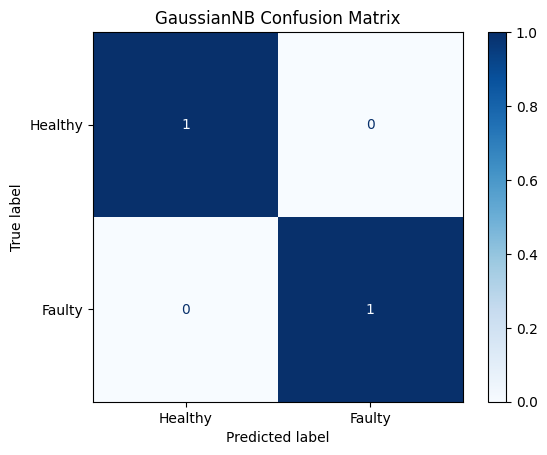

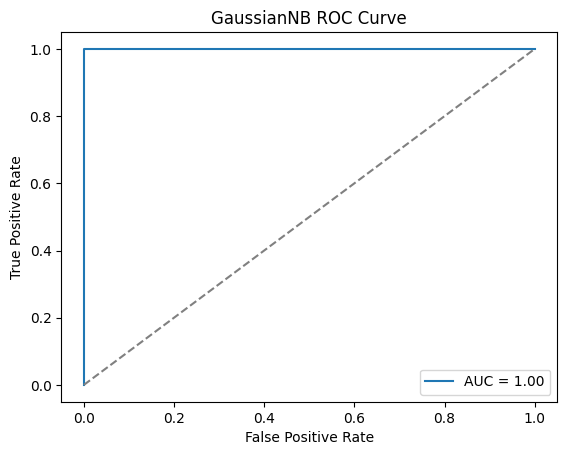

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"GaussianNB Metrics:")
print(f"  Accuracy:  {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall:    {rec:.3f}")
print(f"  F1-Score:  {f1:.3f}\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Healthy','Faulty']).plot(cmap='Blues')
plt.title('GaussianNB Confusion Matrix')
plt.show()

# ROC curve
y_score = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('GaussianNB ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Real Machine Predictive Maintenance

#### Load the dataset from the provided URL

In [15]:
url = "https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/predictive_maintenance.csv"
df = pd.read_csv(url)

# Show first few rows
print("Dataset preview:")
display(df.head())

Dataset preview:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


#### Basic info

In [22]:
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())


Dataset shape: (10000, 11)

Columns: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type', 'HealthState']


#### Data preperation

In [ ]:
# Encode target as binary: Faulty = 1, Healthy = 0
# The 'Target' column already encodes failure = 1, no failure = 0 in this dataset
# To make it more readable:
df['HealthState'] = df['Target'].map({0: 'Healthy', 1: 'Faulty'})

# Drop non-numerical or ID columns
X = df.drop(columns=['UDI', 'Product ID', 'Type', 'Target', 'Failure Type', 'HealthState'])
y = df['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


Dataset shape: (10000, 10)

Columns: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']


#### Fit Gaussian Naïve Bayes

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_score = gnb.predict_proba(X_test)[:, 1]

#### Evaluate performance

In [18]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Performance Metrics:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")


📊 Performance Metrics:
Accuracy:  0.9592
Precision: 0.2927
Recall:    0.1412
F1-Score:  0.1905


| **Metric**               | **Formula**                                                     | **Meaning**                                                                 | **Value**  | **Maintenance Interpretation**                                                                                                            |
| ------------------------ | --------------------------------------------------------------- | --------------------------------------------------------------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**             | $ \frac{TP + TN}{TP + TN + FP + FN} $                           | Overall fraction of correctly classified machines (both healthy and faulty) | **0.9592** | Model correctly labels ~96% of machines, but this mostly reflects *healthy* ones. Faults are rare, so high accuracy is misleading.        |
| **Precision**            | $ \frac{TP}{TP + FP} $                                          | Of all machines predicted *Faulty*, how many are truly faulty               | **0.2927** | Only ~29% of alerts are correct — the model raises **many false alarms**, leading to unnecessary maintenance checks.                      |
| **Recall (Sensitivity)** | $ \frac{TP}{TP + FN} $                                          | Of all truly *Faulty* machines, how many are detected by the model          | **0.1412** | Detects only ~14% of real faults — **misses most failures**, risking unplanned downtime.                                                  |
| **F1-Score**             | $ 2 \times \frac{Precision \times Recall}{Precision + Recall} $ | Harmonic mean of precision and recall; overall fault detection quality      | **0.1905** | Low combined performance — the model is **not reliable yet** for predictive maintenance alerts; needs better fault detection sensitivity. |

### 🧠 Summary Insight

The model is excellent at recognizing healthy machines but poor at identifying faulty ones.
In predictive maintenance terms, this means few failures are caught early, and many alerts are false — further tuning or rebalancing is required for operational reliability.

#### Confusion matrix

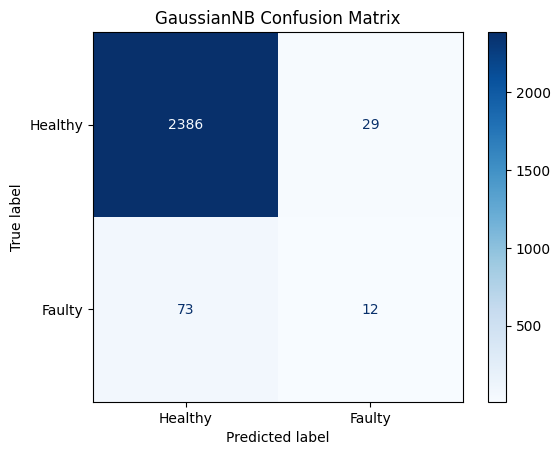

In [19]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Healthy','Faulty']).plot(cmap='Blues')
plt.title('GaussianNB Confusion Matrix')
plt.show()

#### ROC curve

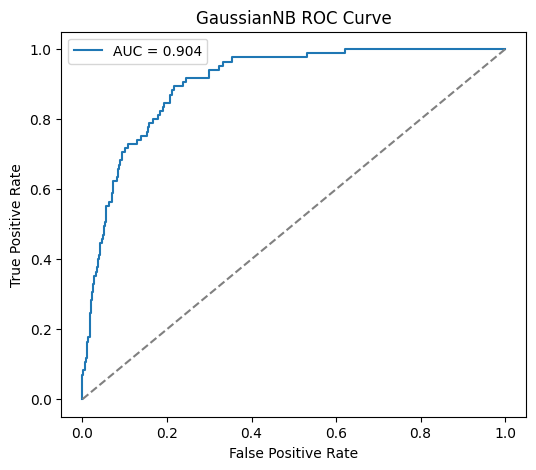

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('GaussianNB ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

***
## NB classifiers Comparison

In [23]:
# Helper function to compute and display metrics
def evaluate_model(name, model, X_test, y_test, y_pred, y_score):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'Faulty']).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
    plt.plot([0,1],[0,1],'--',color='gray')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

#### GaussianNB (for continuous data)


GaussianNB Performance:
  Accuracy : 0.9592
  Precision: 0.2927
  Recall   : 0.1412
  F1-score : 0.1905


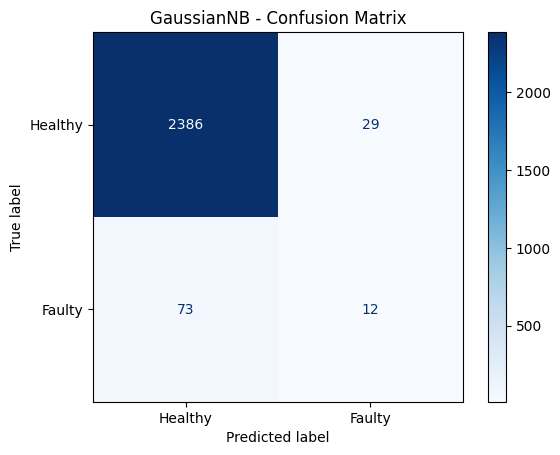

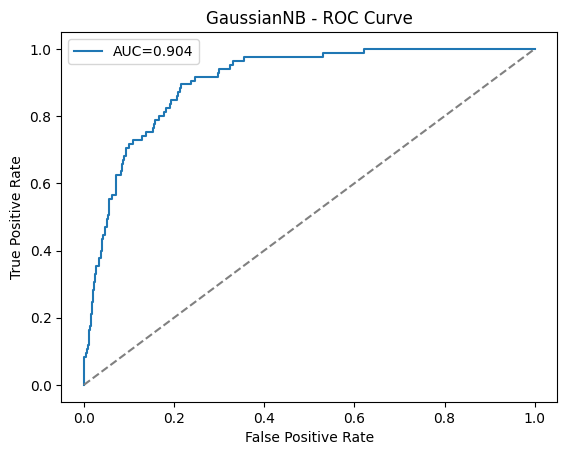

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_score = gnb.predict_proba(X_test)[:,1]
evaluate_model("GaussianNB", gnb, X_test, y_test, y_pred, y_score)

#### MultinomialNB (requires non-negative integer features)


MultinomialNB Performance:
  Accuracy : 0.8088
  Precision: 0.0965
  Recall   : 0.5529
  F1-score : 0.1643


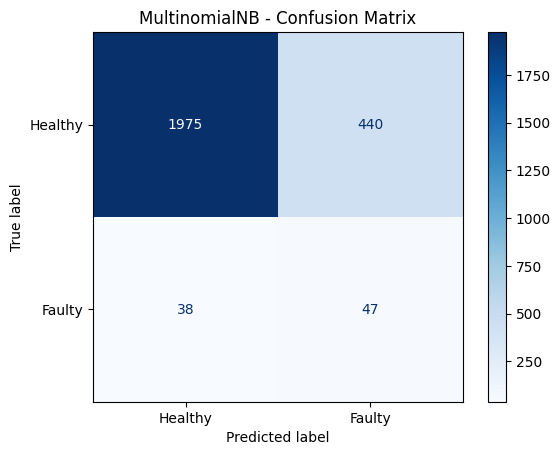

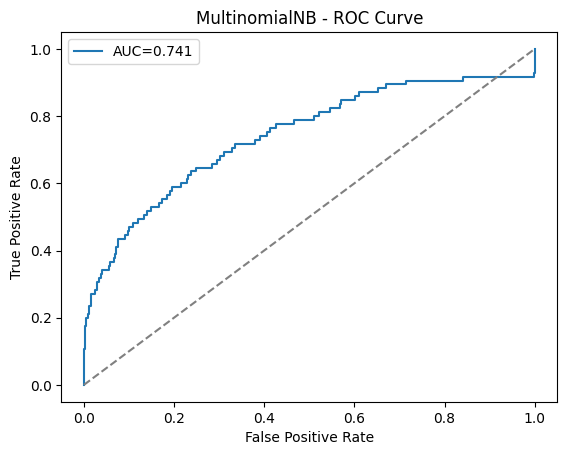

In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_int = np.round(X_scaled * 100).astype(int)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_scaled_int, y, test_size=0.25, random_state=42, stratify=y
)

mnb = MultinomialNB()
mnb.fit(X_train_m, y_train_m)
y_pred = mnb.predict(X_test_m)
y_score = mnb.predict_proba(X_test_m)[:,1]
evaluate_model("MultinomialNB", mnb, X_test_m, y_test_m, y_pred, y_score)

#### CategoricalNB (for discretized features)


CategoricalNB Performance:
  Accuracy : 0.9656
  Precision: 0.4839
  Recall   : 0.1765
  F1-score : 0.2586


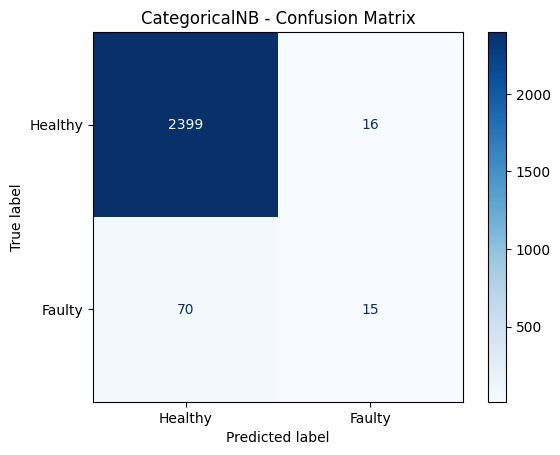

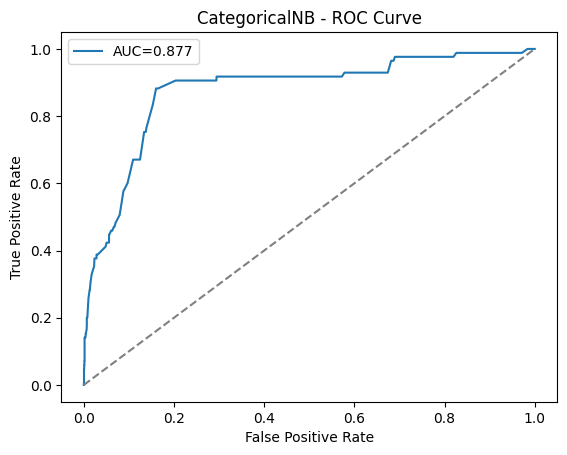

In [29]:
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X_cat = disc.fit_transform(X)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cat, y, test_size=0.25, random_state=42, stratify=y
)

cnb = CategoricalNB()
cnb.fit(X_train_c, y_train_c)
y_pred = cnb.predict(X_test_c)
y_score = cnb.predict_proba(X_test_c)[:,1]
evaluate_model("CategoricalNB", cnb, X_test_c, y_test_c, y_pred, y_score)

#### ComplementNB (variant of MultinomialNB, better for imbalance)


ComplementNB Performance:
  Accuracy : 0.5984
  Precision: 0.0611
  Recall   : 0.7529
  F1-score : 0.1131


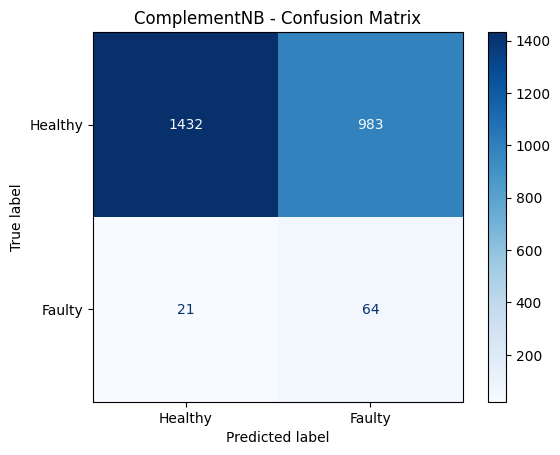

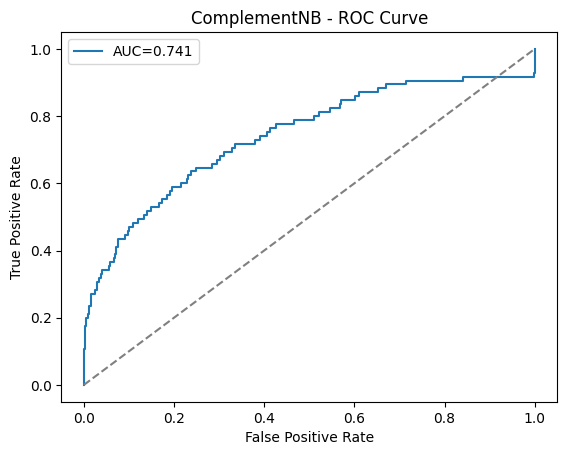

In [30]:
compnb = ComplementNB()
compnb.fit(X_train_m, y_train_m)
y_pred = compnb.predict(X_test_m)
y_score = compnb.predict_proba(X_test_m)[:,1]
evaluate_model("ComplementNB", compnb, X_test_m, y_test_m, y_pred, y_score)